In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akhileshydv","key":"0eb491141a9dadd00d6b314f69282523"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d abcsds/pokemon

  0% 0.00/14.7k [00:00<?, ?B/s]
100% 14.7k/14.7k [00:00<00:00, 9.90MB/s]


In [8]:
!kaggle datasets download -d thec03u5/fifa-18-demo-player-dataset

  0% 0.00/3.82M [00:00<?, ?B/s]
100% 3.82M/3.82M [00:00<00:00, 175MB/s]


In [11]:
!unzip fifa-18-demo-player-dataset.zip
!unzip pokemon.zip

Archive:  fifa-18-demo-player-dataset.zip
  inflating: PlayerPlayingPositionData.csv  
  inflating: CompleteDataset.csv     
  inflating: PlayerPersonalData.csv  
  inflating: PlayerAttributeData.csv  
Archive:  pokemon.zip
  inflating: Pokemon.csv             


In [13]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


In [0]:
import seaborn as sns



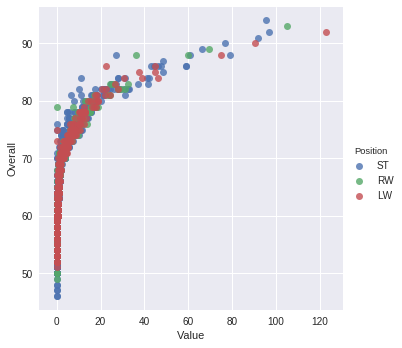

In [16]:
df=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])]
sns.lmplot(x='Value', y='Overall', hue='Position', data=df, fit_reg=False)

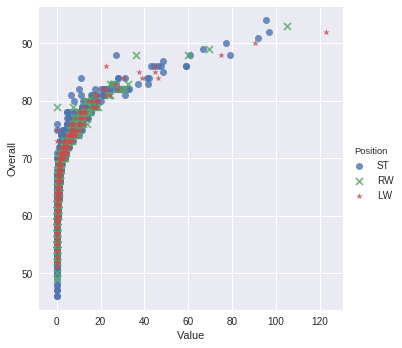

In [18]:
sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position',data=df,fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


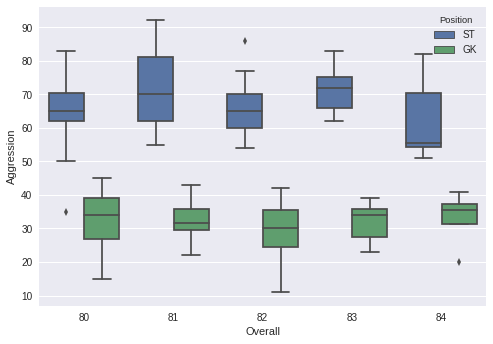

In [19]:
f = (footballers.loc[footballers['Position'].isin(['ST', 'GK'])].loc[:, ['Value', 'Overall', 'Aggression', 'Position']])
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

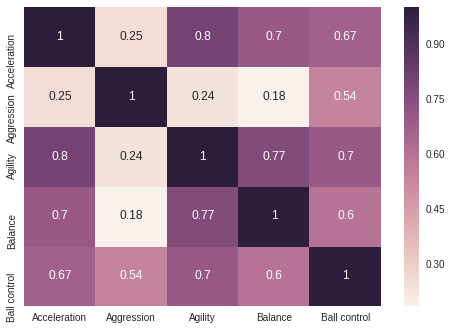

In [26]:
f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)

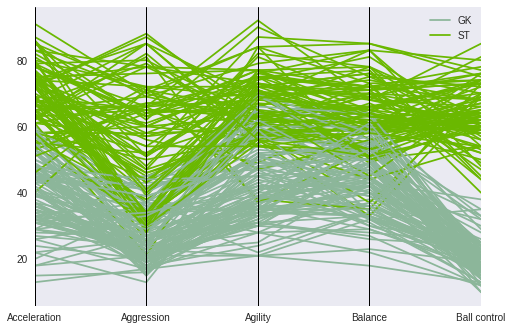

In [24]:
from pandas.plotting import parallel_coordinates

f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

parallel_coordinates(f, 'Position')

In [27]:
pokemon = pd.read_csv("Pokemon.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


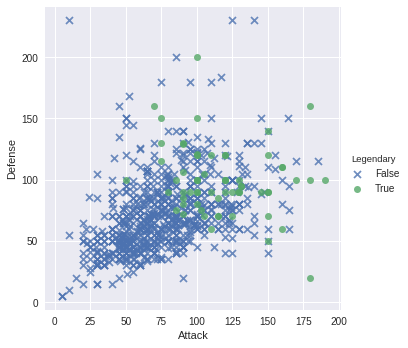

In [36]:
df=pokemon
sns.lmplot(x='Attack', y='Defense',markers=['x','o'], hue='Legendary', data=df, fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


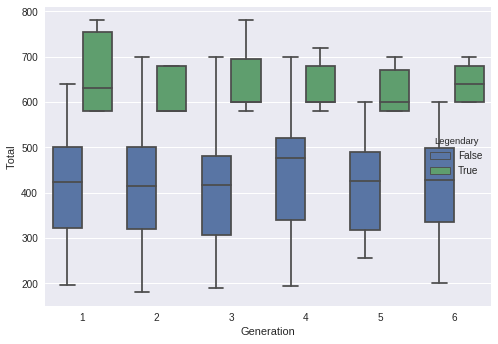

In [34]:
f=pokemon
sns.boxplot(x="Generation", y="Total", hue='Legendary', data=f)

In [38]:
pokemon.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

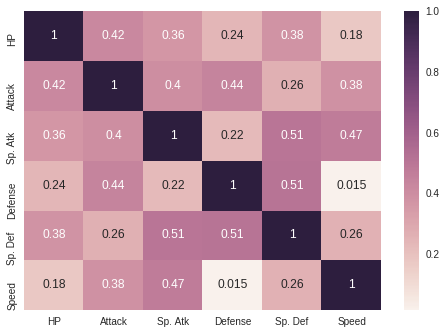

In [44]:
sns.heatmap(
    pokemon.loc[:, ['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']].corr(),
    annot=True
)

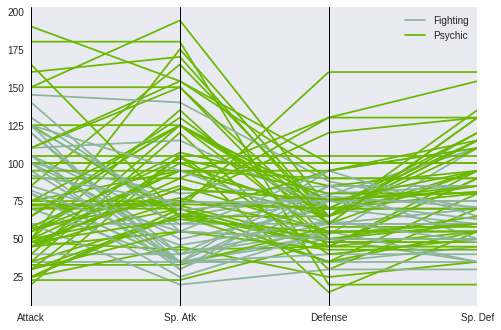

In [45]:
import pandas as pd
from pandas.plotting import parallel_coordinates

p = (pokemon[(pokemon['Type 1'].isin(["Psychic", "Fighting"]))]
         .loc[:, ['Type 1', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def']]
    )

parallel_coordinates(p, 'Type 1')